In [1]:
from PIL import Image
import numpy as np

import torch
import torch.nn
import torch.optim as optim
from torchvision import transforms, models

import network.styler as StyleNet

import utils.func as func


import clip
import torch.nn.functional as F
from utils.text_templates import imagenet_templates

import random

from PIL import Image 
import PIL 
from torchvision import utils as vutils
import argparse
from torchvision.transforms.functional import adjust_contrast

from matplotlib import pyplot as plt

In [2]:
topil = transforms.ToPILImage()
topic = transforms.ToTensor()


In [3]:
def random_patch(img, size):



        channels, height, width = img.shape
        half = size // 2

        point_x = random.randint(half, width - half)
        point_y = random.randint(half, height - half)

        patch = img[:, point_y - half:point_y + half, point_x - half:point_x + half].cpu()

        pil = topil(patch)

        return pil

In [4]:
model,pre = clip.load('ViT-B/32', device="cuda")

In [5]:
score_func = torch.nn.CosineSimilarity()



In [6]:
def get_patch_score(path, text):
    pic1 = topic(Image.open(path))
    size1 = random.randint(32,112)*2
    p1 = pre(random_patch(pic1,size1)).unsqueeze(0).to("cuda")
    v1 = model.encode_image(p1)

    text = [text]
    token = clip.tokenize(text).to("cuda")
    v2 = model.encode_text(token)

    res = score_func(v1,v2)

    return res.item()


In [7]:
length = 64

# path = "../temp/{}.jpg"
# texts = ["boat", "girl", "man", "lotus"]
# num = 4

path = "../temp1/{}.jpg"
texts = ["angry", "Mark Elliot Zuckerberg", "Pixar", "man with dark black skin and black hair"]
num = 4



In [17]:
print("ours")
resli1 = []
for i in range(num):
    for j in range(length):
        resli1.append(get_patch_score(path.format(i+1),texts[i]))
for i in range(num):
    print(sum(resli1[i*64:i*64+64])/64)
print("avg:",sum(resli1)/num/length)

print()

print("style clip")
resli2 = []
for i in range(num):
    for j in range(length):
        resli2.append(get_patch_score(path.format((i+1)*11),texts[i]))
for i in range(num):
    print(sum(resli2[i*64:i*64+64])/64)
print("avg:",sum(resli2)/num/length)

ours
0.2487621307373047
0.27358245849609375
0.20812416076660156
0.26038360595703125
avg: 0.2477130889892578

style clip
0.22249221801757812
0.20925521850585938
0.1915912628173828
0.21426963806152344
avg: 0.20940208435058594


In [9]:
res1 = (sum([x**2 for x in resli1])/(length*num))**0.5
print(res1)
res2 = (sum([x**2 for x in resli2])/(length*num))**0.5
print(res2)

0.2510440008495499
0.21004413353678125


In [10]:
lli = [resli1,resli2]

(array([[ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,  4.,  2.,  3.,
          3.,  5.,  1.,  1.,  5.,  7.,  7.,  9.,  2.,  5.,  6., 10., 11.,
         10., 11.,  5.,  5., 11.,  3.,  5.,  4., 11.,  6.,  5.,  6.,  3.,
          8.,  3.,  9.,  3.,  5.,  3.,  2.,  7.,  4.,  2.,  4.,  4.,  2.,
          3.,  4.,  2.,  2.,  4.,  2.,  2.,  1.,  1.,  1.,  3.,  2.],
        [ 0.,  1.,  0.,  0.,  2.,  0.,  5.,  5.,  3.,  6.,  7.,  7., 13.,
          9., 13., 13., 12., 12., 13., 10., 24., 16., 15., 24., 16.,  6.,
         13.,  3.,  3.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.15795898, 0.1607132 , 0.16346741, 0.16622162, 0.16897583,
        0.17173004, 0.17448425, 0.17723846, 0.17999268, 0.18274689,
        0.1855011 , 0.18825531, 0.19100952, 0.19376373, 0.19651794,
        0.19927216, 0.20202637, 0.20478058, 0.20753479, 0.2102

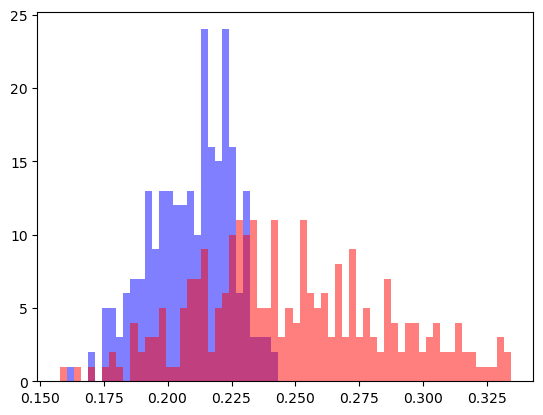

In [11]:
plt.hist(lli, bins=64, alpha=0.5, color=["r","b"], histtype='stepfilled')

# li1 = [
#     0.2544645265322486,
#     0.2675407289560878,
#     0.3388551131359217,
#     0.23511448272211505,
#     ]
#
# li2 = [
#     0.30561701119962764,
#     0.3388551131359217,
#     0.299122750439292,
#     0.26629640945130206,
#     ]

In [12]:
def get_score(path, text):
    pil = Image.open(path)
    p1 = pre(pil).unsqueeze(0).to("cuda")
    v1 = model.encode_image(p1)

    text = [text]
    token = clip.tokenize(text).to("cuda")
    v2 = model.encode_text(token)

    res = score_func(v1,v2)

    return res.item()

In [13]:
print("ours")
t1 = 0
for i in range(num):
    res = get_score(path.format(i+1),texts[i])
    print(res)
    t1+=res
print("avg:",t1/num)

print()


print("styleclip")
t2=0
for i in range(num):
    res = get_score(path.format((i+1)*11),texts[i])
    print(res)
    t2+=res
print("avg:",t2/num)

ours
0.2763671875
0.353759765625
0.233642578125
0.349853515625
avg: 0.30340576171875

styleclip
0.2171630859375
0.256103515625
0.2041015625
0.2191162109375
avg: 0.22412109375


In [14]:
li = []
for j in range(length):
    li.append(get_patch_score("../temp1/0.png","man with black skin and black hair"))
print(sum(li)/length)

li = []
for j in range(length):
    li.append(get_patch_score("../temp1/0.png","woman"))
print(sum(li)/length)

0.2467803955078125
0.23476028442382812


In [15]:
res = get_score("../temp1/4.jpg","woman")
print(res)

0.19580078125
